In [109]:
import pandas as pd
from get_SAB import *
import copy
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.pyplot import figure
import matplotlib

In [110]:

info = {}
info2 = {}
maxSAB = 0.0
with open('leaprRun/tape24','r') as f:
    lines = [line for line in f.readlines() if line[71:75] == '7  4']

    nbeta  = getVal(lines[4],5,'int')
    nalpha = getVal(lines[6],5,'int')
    numAlphaLines = ceil(nalpha/3)
    lines = lines[6:]

    for ibeta in range(nbeta):
        offset = 2
        beta = getVal(lines[0],1)
        alphas, sab = [], []
        for i in range(numAlphaLines):
            for j in range(3):
                alphas.append(getVal(lines[offset+i],2*j  ))
                sabVal = getVal(lines[offset+i],2*j+1)
                sabVal = np.log(sabVal) if sabVal > 1e-9 else -20
                sab.append(sabVal)
                if sab[-1] > maxSAB:
                    maxSAB = sab[-1]
        info[beta] = [alphas,sab]
        info2[beta] = sab
        lines = lines[numAlphaLines+offset:]

    betas = (list(info.keys()))


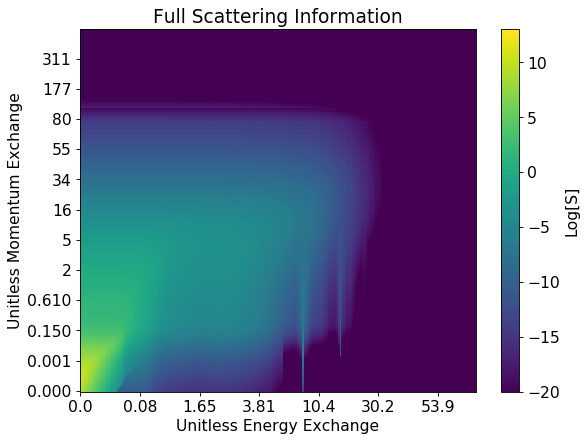

In [132]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
matplotlib.rcParams.update({'font.size': 14})
df = pd.DataFrame(data=info2)
df2 = pd.DataFrame(data=info2, index=alphas,columns=betas)

# plt.pcolor(df, norm=LogNorm(vmin=1e-20, vmax=maxSAB))#, cmap='PuBu_r')
plt.pcolor(df2, vmin=-20, vmax=13)#, cmap='PuBu_r')
plt.colorbar(label='Log[S]')
plt.yticks(np.arange(0.5, len(df2.index), 15), ['%.3f'%x if x < 1 else '%.0f'%x for x in df2.index[::15] ])
plt.xticks(np.arange(0.5, len(df2.columns), 35), df2.columns[::35])
plt.xlabel('Unitless Energy Exchange')
plt.ylabel('Unitless Momentum Exchange')
plt.title('Full Scattering Information')
plt.show()

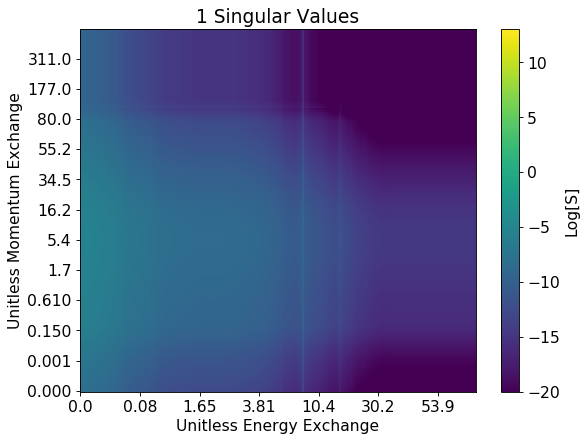

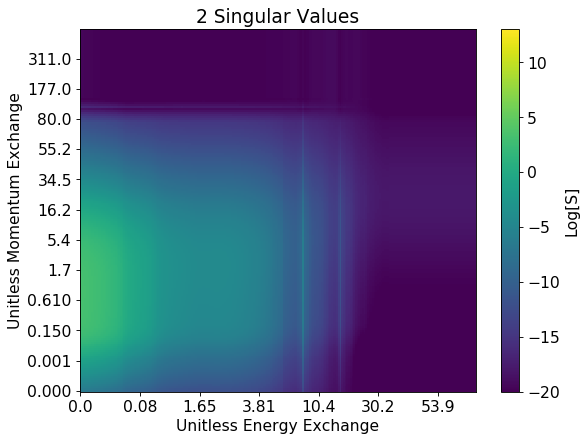

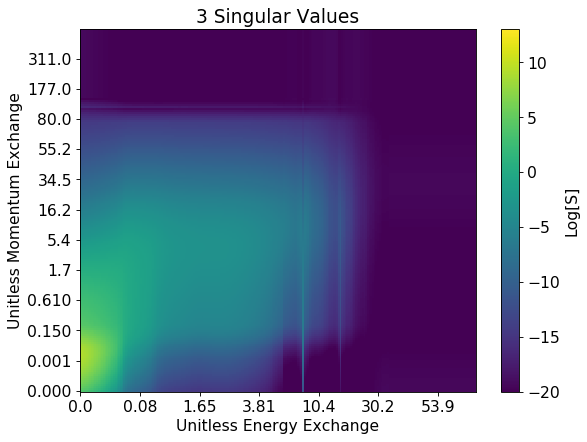

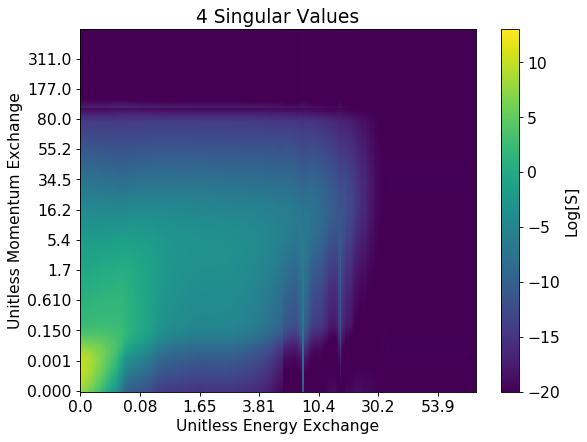

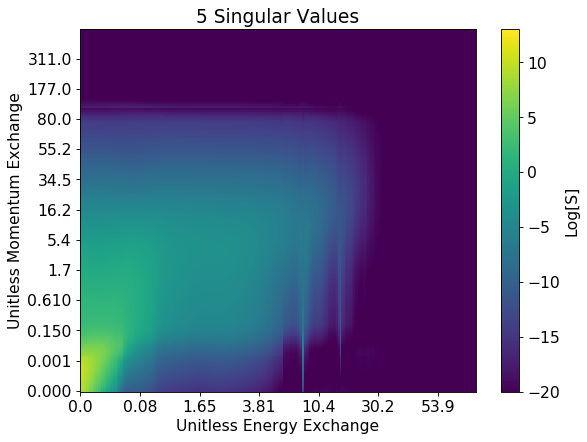

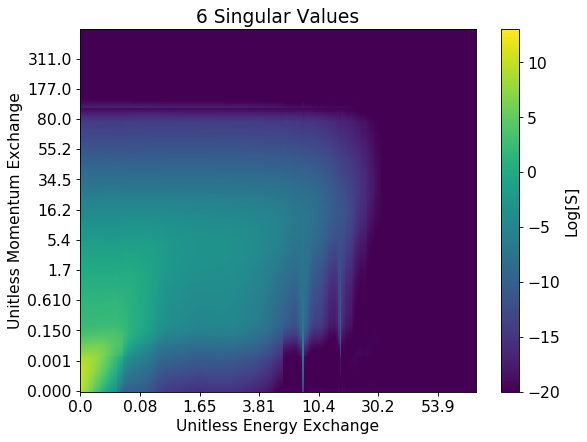

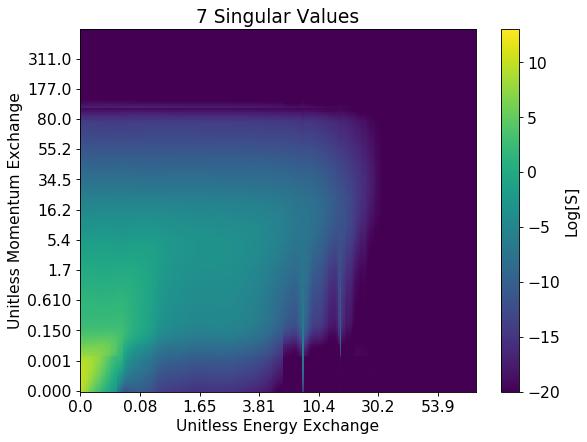

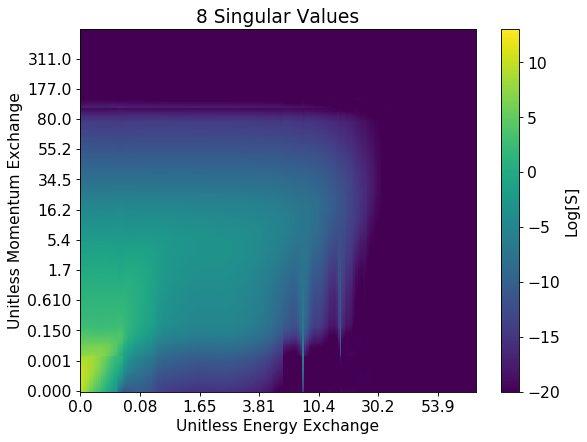

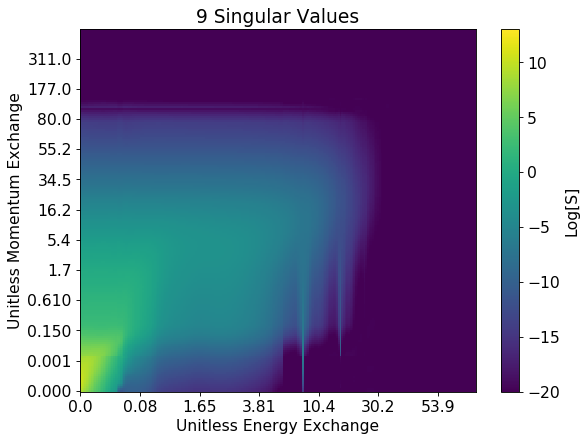

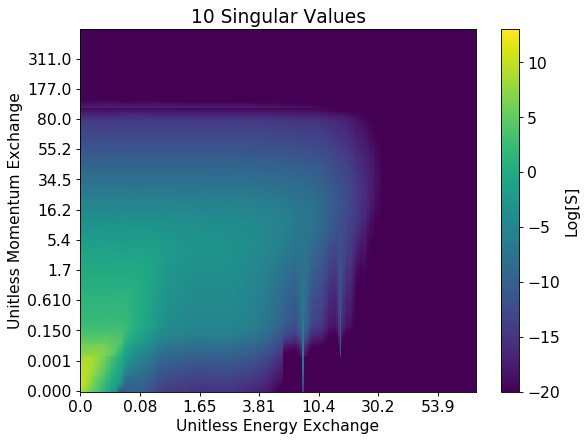

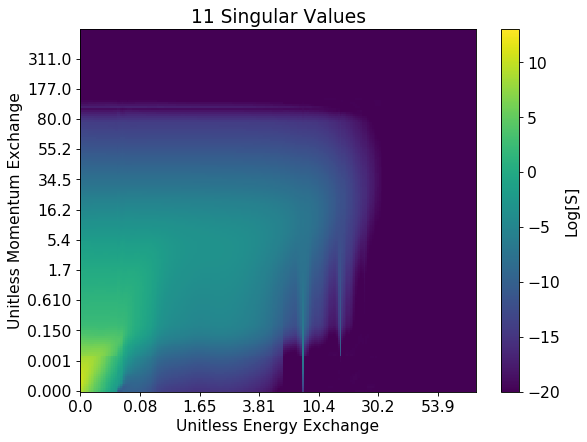

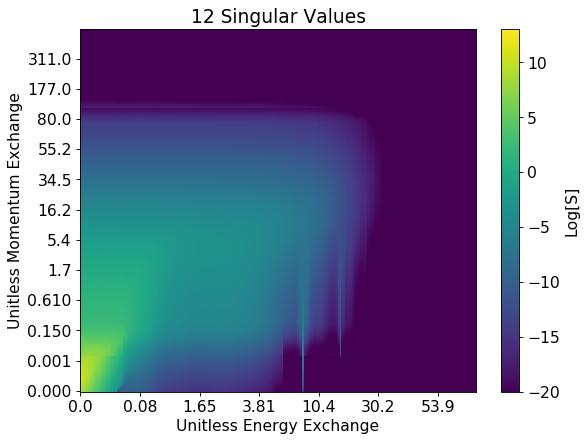

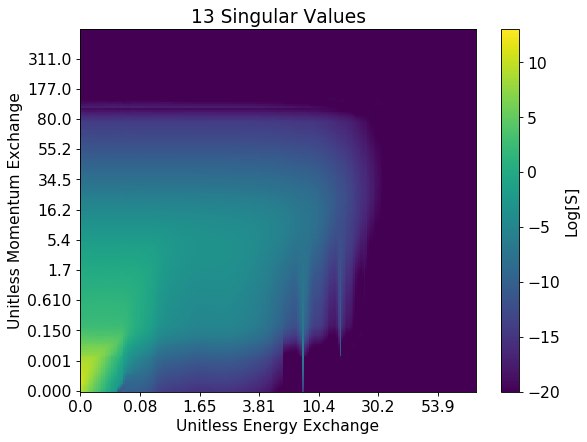

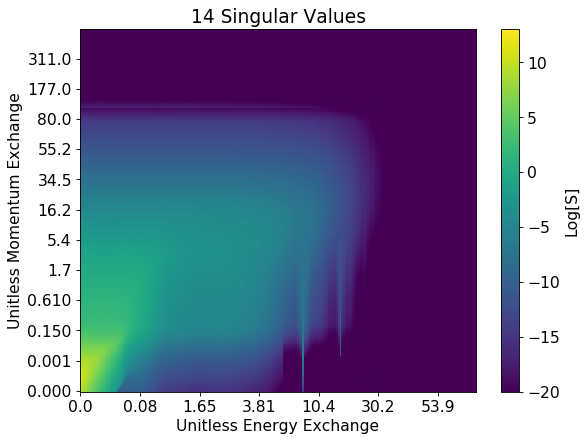

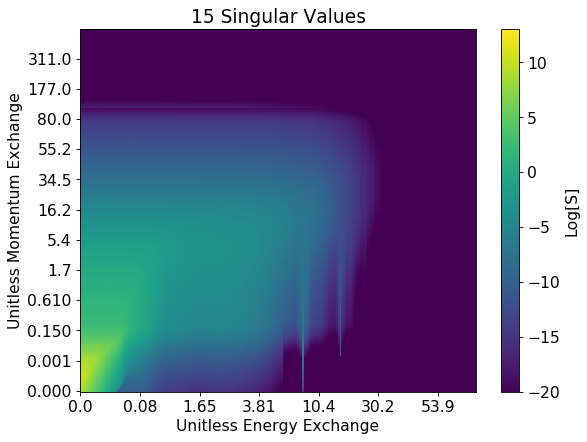

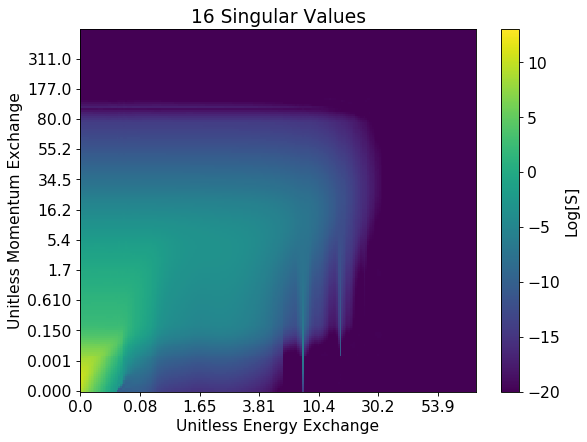

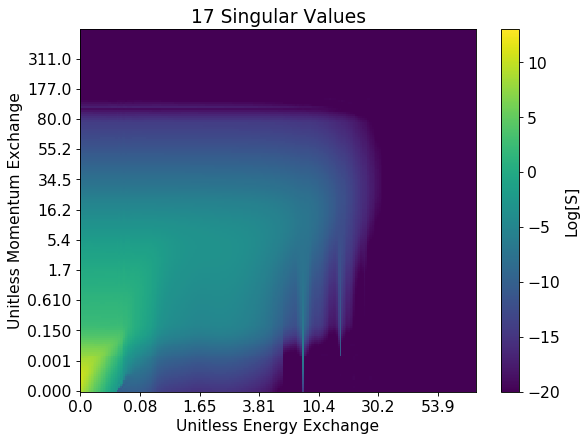

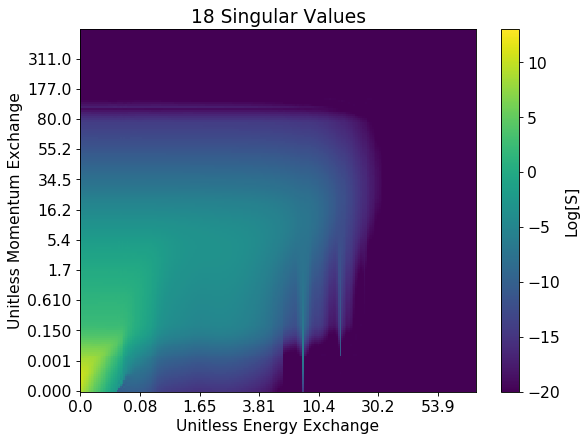

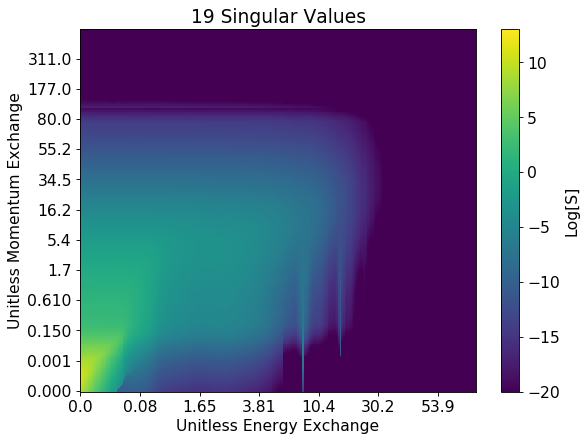

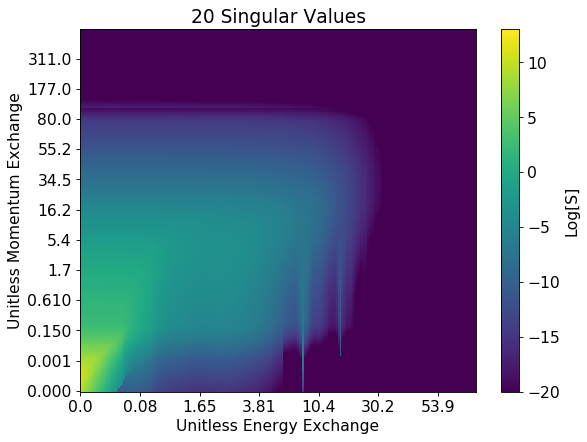

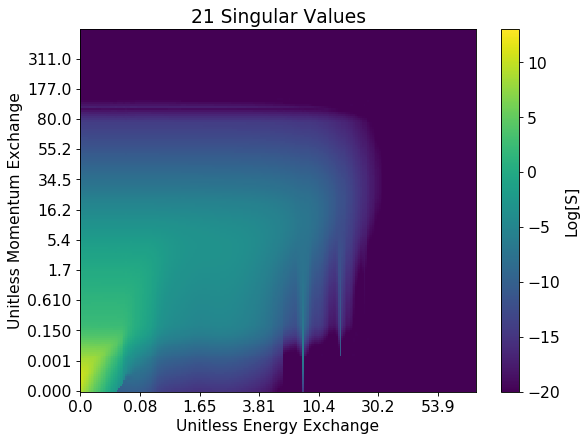

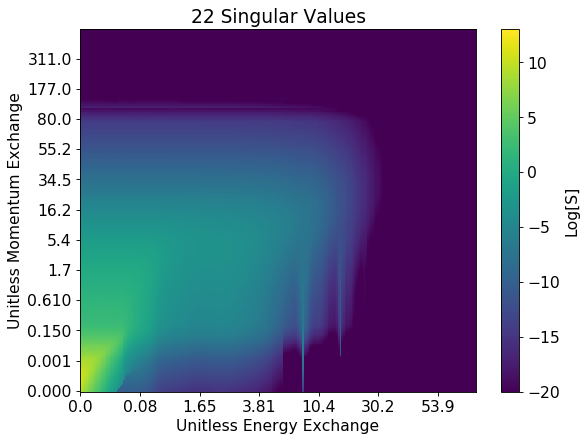

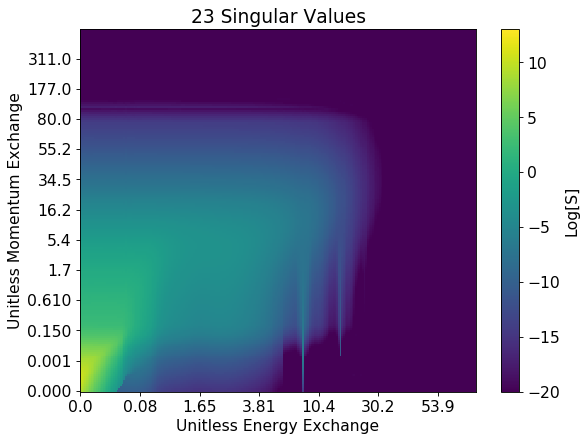

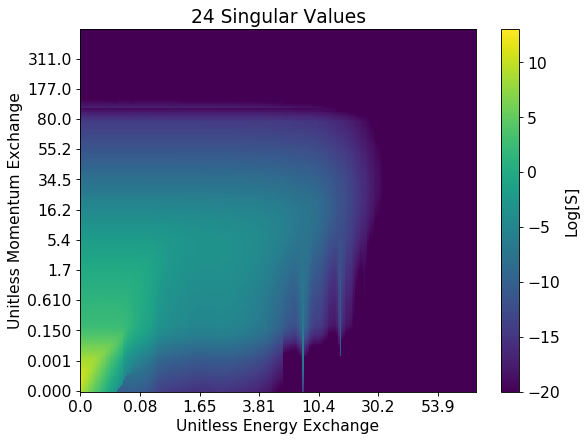

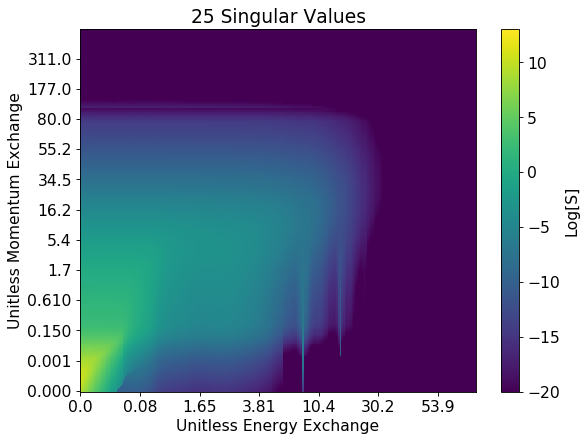

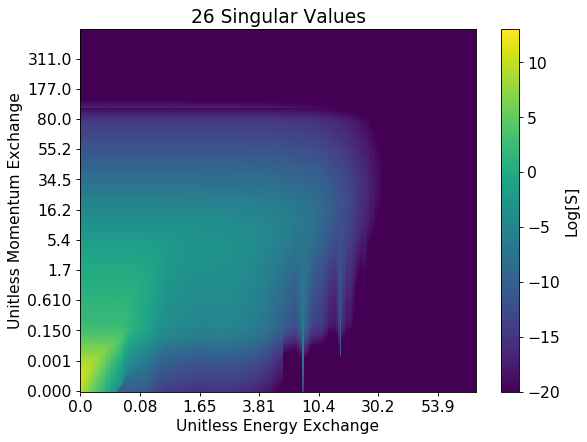

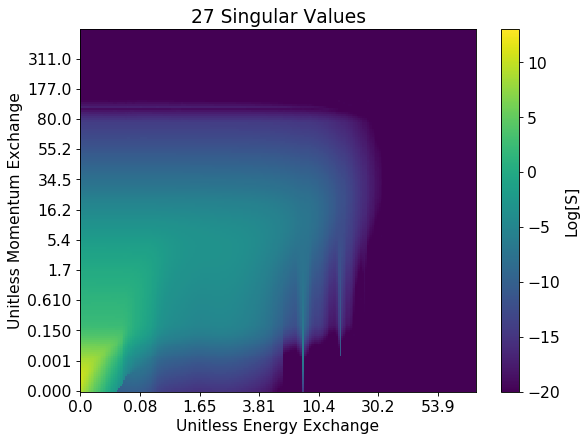

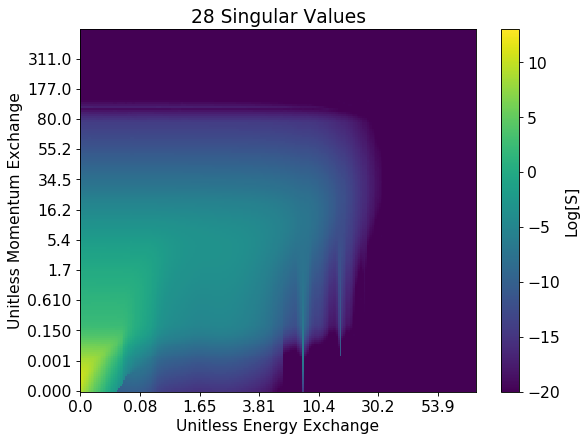

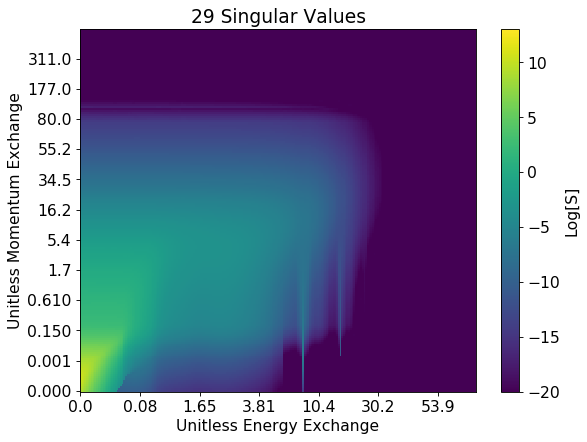

In [87]:
U, sigma, V = np.linalg.svd(df)
norms = []
numEigenVec = list(range(1,30))
for numEigenvals in numEigenVec:
    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    matplotlib.rcParams.update({'font.size': 14})
    A_approx = np.matrix(U[:, :numEigenvals]) * np.diag(sigma[:numEigenvals]) * np.matrix(V[:numEigenvals, :])
    A_approx_df = pd.DataFrame(A_approx)
    norms.append(np.linalg.norm(A_approx_df))
    plt.pcolor(A_approx_df, vmin=-20, vmax=13)
    plt.colorbar(label='Log[S]')
    plt.yticks(np.arange(0.5, len(df2.index), 15), ['%.3f'%x if x < 1 else '%.1f'%x for x in df2.index[::15] ])
    plt.xticks(np.arange(0.5, len(df2.columns), 35), df2.columns[::35])
    plt.xlabel('Unitless Energy Exchange')
    plt.ylabel('Unitless Momentum Exchange')
    plt.title(str(numEigenvals)+' Singular Values')
    plt.show()

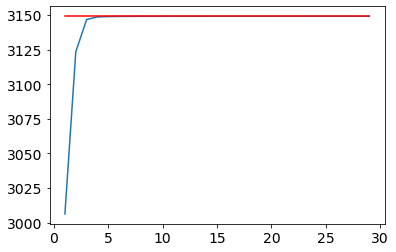

In [80]:
plt.plot(numEigenVec,norms)
plt.plot([numEigenVec[0],numEigenVec[-1]],[np.linalg.norm(df),np.linalg.norm(df)],'r')
# plt.ylim([774000,774200])

Text(0.5, 1.0, 'Singular Values of S($\\alpha,\\beta$)')

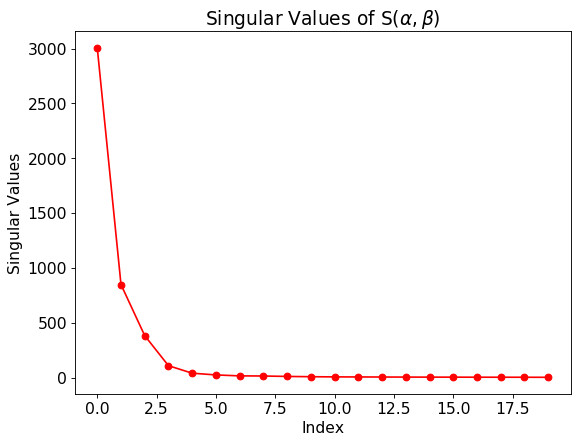

In [90]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.plot(sigma[:20],'ro-')
plt.ylabel('Singular Values')
plt.xlabel('Index')
plt.title(r'Singular Values of S($\alpha,\beta$)')

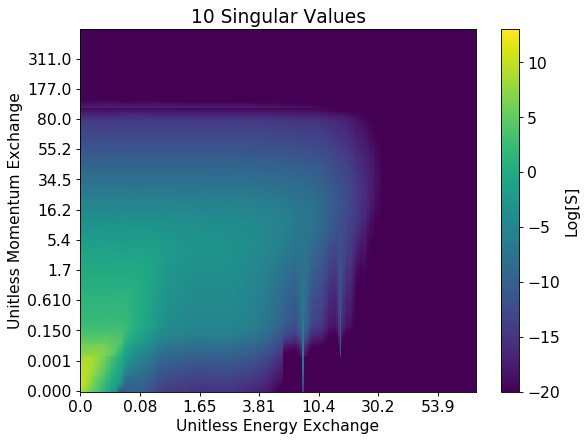

In [116]:
U, sigma, V = np.linalg.svd(df)
norms = []
numEigenvals = 10
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
matplotlib.rcParams.update({'font.size': 14})
A_approx = np.matrix(U[:, :numEigenvals]) * np.diag(sigma[:numEigenvals]) * np.matrix(V[:numEigenvals, :])
A_approx_df = pd.DataFrame(A_approx)
plt.pcolor(A_approx_df, vmin=-20, vmax=13)
plt.colorbar(label='Log[S]')
plt.yticks(np.arange(0.5, len(df2.index), 15), ['%.3f'%x if x < 1 else '%.1f'%x for x in df2.index[::15] ])
plt.xticks(np.arange(0.5, len(df2.columns), 35), df2.columns[::35])
plt.xlabel('Unitless Energy Exchange')
plt.ylabel('Unitless Momentum Exchange')
plt.title(str(numEigenvals)+' Singular Values')
plt.show()

In [156]:
final_SAB_approx = []
for i in range(len(A_approx_df)):
    thisVec = []
    for j in range(len(A_approx_df[0])):
        thisVec.append(np.exp(A_approx_df[i][j]))
    final_SAB_approx.append(thisVec)

In [159]:
true_df = pd.DataFrame(data=info2)
true_df.columns = list(range(len(true_df.columns)))
true_df.index = list(range(len(true_df[0])))
final_SAB = []
for i in range(len(true_df)):
    thisVec = []
    for j in range(len(true_df[0])):
        thisVec.append(np.exp(true_df[i][j]))
    final_SAB.append(thisVec)

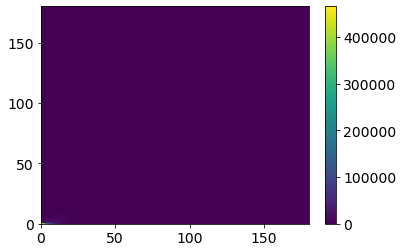

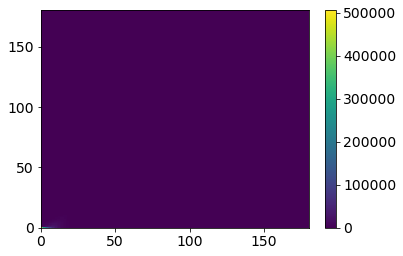

In [167]:
plt.pcolor(final_SAB_approx)
plt.colorbar()
plt.show()
plt.pcolor(final_SAB)
plt.colorbar()